### Quiz

In [1]:
import pandas as pd

transkip = pd.read_csv('dataset/transkip.csv')
lulusan = pd.read_csv('dataset/lulusan.csv')

df_transkip = pd.DataFrame( transkip )
df_lulusan = pd.DataFrame( lulusan )

df_transkip

,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade
0,1,15416255201060,F02160009,Entrepreneurship,Entrepreneurship,Entrepreneurship,3.50,84.25,5,2,B+
1,2,15416255201060,F02160010,Kerja Praktik,Kerja Praktik,Internship,3.75,88.25,6,3,A-
2,3,15416255201060,IF1160020,Desain & Analisis Algoritma,Desain & Analisis Algoritma,Analysis Algorithm & Design,3.50,81.70,3,3,B+
3,4,15416255201060,IF1160021,Analisis & Desain System Berorientasi Obyek,Analisis & Desain System Berorientasi Obyek,Object Oriented Design System,3.75,86.80,3,3,A-
4,5,15416255201060,IF1160022,Pemrograman Berorientasi Objek (*),Pemrograman Berorientasi Objek,Object Oriented Programming,3.75,85.50,3,3,A-
...,...,...,...,...,...,...,...,...,...,...,...
256294,259312,16416286206133,UBP160004,BAHASA INDONESIA,Bahasa Indonesia,Indonesian,3.75,86.20,2,2,A-
256295,259313,16416286206133,UBP160005,JATIDIRI BANGSA,Jatidiri Bangsa,National Identity,3.75,85.25,3,2,A-
256296,259314,16416286206133,UBP160006,KKN,KKN,Community Service,3.75,84.55,7,3,A-
256297,259315,16416286206133,UBP160007,GENERAL ENGLISH,General English,General English,2.76,70.35,1,2,B-


#### 1. Integrasi dan Pembersihan Data.


##### Cari IPS setiap semester permahasiswa. ini bisa memudahkan untuk normalisasi data

In [2]:
def hitung_ips(df):
    # Kelompokkan data berdasarkan NIM dan Semester
    grouped = df.groupby(['nim', 'semester'])
    
    # Buat list untuk menyimpan hasil perhitungan IPS
    ips_data = []
    
    for (nim, semester), group in grouped:
        # Hitung nilai total (jumlah perkalian nilai dengan SKS) dan jumlah total SKS
        nilai_total = (group['nilai_grade'] * group['sks_mk']).sum()
        total_sks = group['sks_mk'].sum()
        
        # Hitung IPS
        if total_sks > 0:
            ips = round(nilai_total / total_sks, 2)
        else:
            ips = 0
        
        # Tambahkan data IPS ke list
        ips_data.append({'nim': nim, 'semester': semester, 'ips': ips})
    
    # Buat DataFrame dari list data IPS
    df_ips = pd.DataFrame(ips_data)
    
    return df_ips

# Hitung IPS untuk data transkrip nilai
ips_transkrip = hitung_ips(df_transkip)

# Tampilkan hasil
df_ips_transkrip = pd.DataFrame(ips_transkrip)
df_ips_transkrip.drop_duplicates().head(10)


,nim,semester,ips
0,15416226201001,1,3.20
1,15416226201001,2,3.40
2,15416226201001,3,2.93
3,15416226201001,4,2.99
4,15416226201001,5,3.33
5,15416226201001,6,3.41
6,15416226201001,7,3.42
7,15416226201001,8,3.50
8,15416226201002,1,3.28
9,15416226201002,2,3.37


##### Gabungkan IPS permahasiswa dengan dataset yang lainya ("ms_lulusan") berdasarkan NIM.

In [3]:
df_merge = pd.merge(df_ips_transkrip, df_lulusan, on='nim', how='left')
df_merge.head(20)

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
5,15416226201001,6,3.41,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
6,15416226201001,7,3.42,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
7,15416226201001,8,3.50,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
8,15416226201002,1,3.28,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
9,15416226201002,2,3.37,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1


##### Tambahkan hasil dari durasi studi masing-masing mahasiswa


In [4]:
def hitung_durasi_studi(df):
    
    # Konversi kolom tanggal_lulus dan tgl_masuk kedalam tipe data datetime
    df['tanggal_lulus'] = pd.to_datetime(df['tanggal_lulus'])
    df['tgl_masuk'] = pd.to_datetime(df['tgl_masuk'])

    # Kelompokkan data berdasarkan NIM
    grouped = df.groupby('nim')

    durasi_studi_data = []
    
    for (nim), group in grouped:
        # Hitung nilai total (jumlah perkalian nilai dengan SKS) dan jumlah total SKS
        durasi_studi = (group['tanggal_lulus'] - group['tgl_masuk']).sum()
        # Ambil tahun, bulan, dan hari dari objek timedelta
        durasi_studi_years = durasi_studi.days // 365
        
        # Tambahkan data IPS ke list
        durasi_studi_str = f"{durasi_studi_years} tahun"
        durasi_studi_data.append({'nim': nim, 'durasi_studi': durasi_studi_str})
    
    # Buat DataFrame dari list data IPS
    df_durasi_studi = pd.DataFrame(durasi_studi_data)
    return df_durasi_studi

# Hitung IPS untuk data transkrip nilai
durasi_studi = hitung_durasi_studi(df_lulusan)
durasi_studi

# Tampilkan hasil
df_durasi_studi = pd.DataFrame(durasi_studi)
df_durasi_studi.drop_duplicates()

df_merge_studi = pd.merge(df_merge, df_durasi_studi, on='nim', how='left')
df_merge_studi['durasi_studi'] == '5 tahun'

0        False
1        False
2        False
3        False
4        False
         ...  
36223    False
36224    False
36225    False
36226    False
36227    False
Name: durasi_studi, Length: 36228, dtype: bool

##### Lakukan pembersihan data, termasuk mengidentifikasi dan mengatasi nilai yang hilang atau tidak konsisten dalam data. Hilangkan mahasiswa pindahan.

In [5]:
# Cek atribut yang null 
df_merge_studi.isnull()

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,durasi_studi
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
36223,False,False,False,False,False,False,False,False,False,False,False,False
36224,False,False,False,False,False,False,False,False,False,False,False,False
36225,False,False,False,False,False,False,False,False,False,False,False,False
36226,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Jumlah nilai yang hilang disetiap kolom
print('Jumlah nilai yang hilang disetiap kolom')
df_merge.isnull().sum()

Jumlah nilai yang hilang disetiap kolom


nim               0
semester          0
ips               0
prodi             0
predikat          0
tanggal_lulus     0
tgl_masuk         0
status_masuk      0
jenis_kelamin     0
tahun_lahir       0
status_pegawai    0
dtype: int64

In [7]:
# Menghilangkan mahahsiswa pindahan
cleaned = df_merge_studi[df_merge_studi['status_masuk'] == 0]
cleaned

,nim,semester,ips,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,durasi_studi
0,15416226201001,1,3.20,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 tahun
1,15416226201001,2,3.40,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 tahun
2,15416226201001,3,2.93,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 tahun
3,15416226201001,4,2.99,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 tahun
4,15416226201001,5,3.33,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 tahun
...,...,...,...,...,...,...,...,...,...,...,...,...
36223,20416286206132,4,3.76,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2 tahun
36224,20416286206132,5,3.67,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2 tahun
36225,20416286206132,6,3.79,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2 tahun
36226,20416286206132,7,3.97,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,2 tahun


In [8]:
# Konversi format tanggal
cleaned['tanggal_lulus'] = pd.to_datetime(cleaned['tanggal_lulus']).dt.strftime('%Y-%m-%d')
cleaned['tgl_masuk'] = pd.to_datetime(cleaned['tgl_masuk']).dt.strftime('%Y-%m-%d')

# Standardisasi jenis kelamin
cleaned['jenis_kelamin'] = cleaned['jenis_kelamin'].replace({
    'L': 'Laki-laki',
    'P': 'Perempuan',
    'laki-laki': 'Laki-laki',
    'perempuan': 'Perempuan'
})

# Cek format tanggal dan jenis kelamin yang telah distandardisasi

df_cleaned = pd.DataFrame(cleaned[['nim','tanggal_lulus', 'tgl_masuk', 'jenis_kelamin']])
df_cleaned

C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_8296\745940379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['tanggal_lulus'] = pd.to_datetime(cleaned['tanggal_lulus']).dt.strftime('%Y-%m-%d')
C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_8296\745940379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['tgl_masuk'] = pd.to_datetime(cleaned['tgl_masuk']).dt.strftime('%Y-%m-%d')
C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_8296\745940379.py:6: Setting

,nim,tanggal_lulus,tgl_masuk,jenis_kelamin
0,15416226201001,2019-08-31,2015-09-06,1
1,15416226201001,2019-08-31,2015-09-06,1
2,15416226201001,2019-08-31,2015-09-06,1
3,15416226201001,2019-08-31,2015-09-06,1
4,15416226201001,2019-08-31,2015-09-06,1
...,...,...,...,...
36223,20416286206132,2023-08-29,2020-09-09,0
36224,20416286206132,2023-08-29,2020-09-09,0
36225,20416286206132,2023-08-29,2020-09-09,0
36226,20416286206132,2023-08-29,2020-09-09,0


#### 2. Cari pola atau tren yang paling mempengaruhi dengan lulusan tepat waktu atau lama masa studi:
##### Analisis untuk melihat apakah durasi studi lebih pendek berkorelasi dengan predikat kelulusan yang lebih baik

In [9]:
# Tambahkan kolom lulus_tepat_waktu berdasarkan durasi studi
df_merge_studi['lulus_tepat_waktu'] = df_merge_studi['durasi_studi'].apply(lambda x: 1 if 'tahun' in x and int(x.split()[0]) <= 4 else 0)

# Hitung korelasi antara nilai rata-rata mata kuliah atau IPS dengan status kelulusan tepat waktu
correlation = df_merge_studi['ips'].corr(df_merge_studi['lulus_tepat_waktu'])

print("Korelasi antara nilai IPS dengan lulus tepat waktu:", correlation)

Korelasi antara nilai IPS dengan lulus tepat waktu: 0.17868232015572583


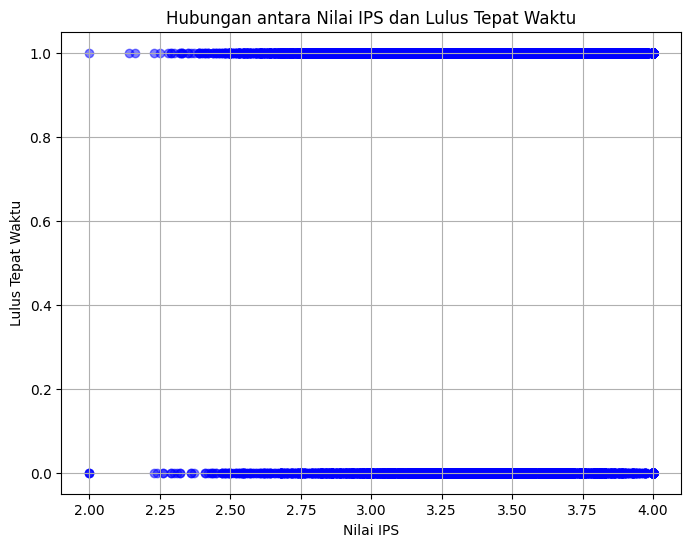

In [10]:
import matplotlib.pyplot as plt

# Plot scatterplot antara nilai IPS dan status lulus tepat waktu
plt.figure(figsize=(8, 6))
plt.scatter(df_merge_studi['ips'], df_merge_studi['lulus_tepat_waktu'], color='blue', alpha=0.5)
plt.title('Hubungan antara Nilai IPS dan Lulus Tepat Waktu')
plt.xlabel('Nilai IPS')
plt.ylabel('Lulus Tepat Waktu')
plt.grid(True)
plt.show()

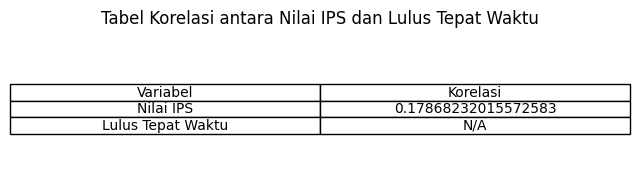

In [11]:
# Buat DataFrame untuk tabel korelasi
data_correlation = {'Variabel': ['Nilai IPS', 'Lulus Tepat Waktu'], 'Korelasi': [correlation, 'N/A']}
df_correlation = pd.DataFrame(data_correlation)

# Plot tabel korelasi
plt.figure(figsize=(8, 2))
plt.table(cellText=df_correlation.values,
          colLabels=df_correlation.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='center')
plt.title('Tabel Korelasi antara Nilai IPS dan Lulus Tepat Waktu')
plt.axis('off')
plt.show()
